In [1]:
import matplotlib.pyplot as data_plt
import matplotlib.pyplot as error_plt
import numpy as np
import csv
import pandas as pd

In [2]:
arr1 = np.array([1, -3, 15, -466])
print ("Square Value of arr1 : \n", np.square(arr1), ) 
arr_sqr = arr1**2
print ("Square Value of arr1 : \n", arr_sqr)

Square Value of arr1 : 
 [     1      9    225 217156]
Square Value of arr1 : 
 [     1      9    225 217156]


#CSV

In [3]:
# data preparation
invest = [10,12,13,15,19,23,25,27,32,34,37,40,41.5,45]
sales  = [20,24,22,26,33,32,38,44,45,51,53,55,60,55]
invest = np.array(invest)
sales = np.array(sales)

n = len(invest)
with open("sales.csv", 'w') as f:  ## equivalent to f=open() and f.close
    writer = csv.writer(f)
    writer.writerow(["id", "invest", "sales"])
    for i in range(n):
        writer.writerow([i+1, invest[i], sales[i]])

#pandas

In [4]:
#dataframe
#series

df = pd.read_csv("sales.csv")
#print(df, type(df))

x = df["invest"]
y = df["sales"]
#print( type(x))
print( type(y))
## we can also do
m1=2
c1=5
#print(m1*x+c1)

<class 'pandas.core.series.Series'>


m =  1.421476835644358 c =  0.5972800196383591
0     14.812048
1     17.655002
2     19.076479
3     21.919433
4     27.605340
5     33.291247
6     36.134201
7     38.977155
8     46.084539
9     48.927492
10    53.191923
11    57.456353
12    59.588569
13    64.563738
Name: invest, dtype: float64 MSE =  18.21629132309248


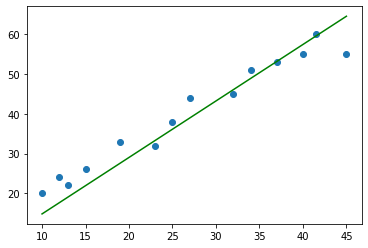

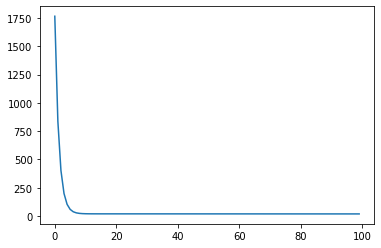

In [7]:
np.set_printoptions(precision=3)
n = len(x)
mean_error_per_iteration=[]
#parameters
m = 0
c = 0
#hyper parameters
iter = 200
learning_rate = .001

# performing Gradient Descent
for i in range(iter):
    #Predicting y_hat using current value of m and c
    y_hat = m * x + c  ## Calculating predicted value for every x, using current value of m & c
    #print(y_hat)

    ## Calculating error for the current predicted values
    error = ( y - y_hat)
    #print("Error= ",error)
    #print("avg_error",sum(np.square(error))/n)
    mean_error_per_iteration.append( sum(np.square(error))/n ) 
    #mean_squared_error_per_iteration.append( sum(np.absolute(error))/n ) 
    
    #calculating gradient 
    dm = (-2/n) * sum( (y - y_hat)*x ) ## gradient of Error w.r.t. m
    dc = (-2/n) * sum( y - y_hat ) # gradient of Error w.r.t. c
    
    #update m & c
    m = m - learning_rate*dm
    c = c - learning_rate*dc
    #print("m = ",m ,"c = ", c)
print("m = ",m ,"c = ", c)

#make prediction using the learned line
y_predicted = m*x + c
print(y_predicted, "MSE = ", ( sum( (y - y_predicted)**2 ) )/n )

## graphical presentation of the data and the learned line
## data
data_plt.scatter(x, y)

## line
x1=min(x)
x2=max(x)
y1=min(y_predicted)
y2=max(y_predicted)
data_plt.plot([x1, x2], [y1, y2], color = "green")
data_plt.show()

## plotting the error per iteration
error_plt.plot(range(0,len(mean_error_per_iteration[0:100])), mean_error_per_iteration[0:100])
error_plt.show()